## Rodando modelo 1

código de <https://towardsdatascience.com/an-introduction-to-bayesian-inference-in-pystan-c27078e58d53>

In [1]:
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()  # Nice plot aesthetic
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x, sigma);
}
"""

In [2]:
# Parameters to be inferred
alpha = 4.0
beta = 0.5
sigma = 1.0

# Generate and plot data
x = 10 * np.random.rand(100)
y = alpha + beta * x
y = np.random.normal(y, scale=sigma)

alpha = 4.0
beta = 0.5
sigma = 1.0


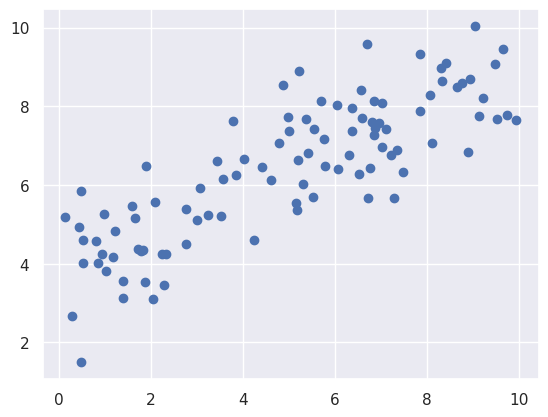

In [3]:
plt.scatter(x,y)
print(f"alpha = {alpha}\nbeta = {beta}\nsigma = {sigma}")

In [4]:
# pra fazer os negócios funcionar
import nest_asyncio
nest_asyncio.apply()

# pra sumir com os warnings
import warnings
warnings.filterwarnings('ignore')  # não deu certo :(

In [5]:
# Put our data in a dictionary
data = {'N': len(x), 'x': x, 'y': y}


# Compile the model
sm = stan.build(model, data=data, random_seed=1)

# Train the model and generate samples
posterior = stan.build(model, data=data, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=1000)
fit #["eta"]  # array with shape (8, 4000)


Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 3.5e-05 seconds
  100

<stan.Fit>
Parameters:
    alpha: ()
    beta: ()
    sigma: ()
Draws: 4000

In [6]:
alpha = fit['alpha'].reshape(4000,)
beta = fit['beta'].reshape(4000,)
sigma = fit['sigma'].reshape(4000,)

In [7]:
fit['alpha']

array([[4.116239  , 3.9346961 , 4.05922276, ..., 3.48342703, 3.74906799,
        3.80896964]])

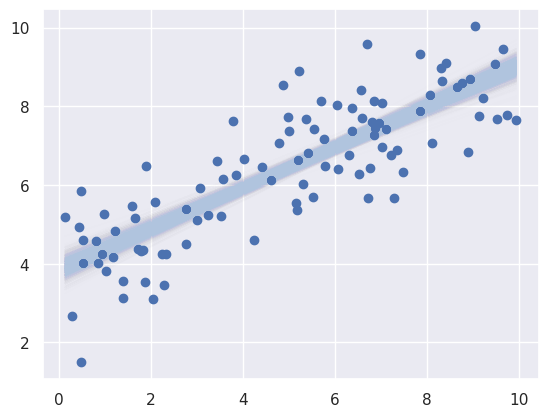

In [8]:
x_plot = np.linspace(x.min(), x.max(), 100)
plt.scatter(x,y)
for i in np.random.randint(0, len(alpha), 1000):
  plt.plot(x_plot, alpha[i] + beta[i] * x_plot, color='lightsteelblue', 
           alpha=0.005)

(array([  0.,   1.,   0.,   1.,   1.,   2.,   3.,   1.,   3.,   9.,  10.,
         12.,  17.,  17.,  36.,  35.,  64.,  65.,  70., 105., 107., 148.,
        160., 189., 192., 210., 209., 236., 228., 229., 219., 208., 196.,
        181., 148., 147., 126.,  95.,  91.,  57.,  55.,  34.,  21.,  21.,
          9.,  11.,  11.,   4.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([3.  , 3.03, 3.06, 3.09, 3.12, 3.15, 3.18, 3.21, 3.24, 3.27, 3.3 ,
        3.33, 3.36, 3.39, 3.42, 3.45, 3.48, 3.51, 3.54, 3.57, 3.6 , 3.63,
        3.66, 3.69, 3.72, 3.75, 3.78, 3.81, 3.84, 3.87, 3.9 , 3.93, 3.96,
        3.99, 4.02, 4.05, 4.08, 4.11, 4.14, 4.17, 4.2 , 4.23, 4.26, 4.29,
        4.32, 4.35, 4.38, 4.41, 4.44, 4.47, 4.5 , 4.53, 4.56, 4.59, 4.62,
        4.65, 4.68, 4.71, 4.74, 4.77, 4.8 , 4.83, 4.86, 4.89, 4.92, 4.95,
        4.98]),
 <BarContainer object of 66 artists>)

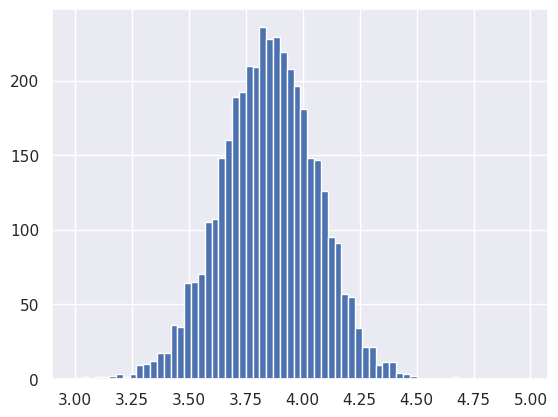

In [9]:
bins = np.arange(3,5,.03)
plt.hist(alpha, bins = bins)

In [10]:
def plot_trace(param, param_name='parameter'):
  """Plot the trace and posterior of a parameter."""
  
  # Summary statistics
  mean = np.mean(param)
  median = np.median(param)
  cred_min, cred_max = np.percentile(param, 2.5), np.percentile(param, 97.5)
  
  # Plotting
  plt.subplot(2,1,1)
  plt.plot(param)
  plt.xlabel('samples')
  plt.ylabel(param_name)
  plt.axhline(mean, color='r', lw=2, linestyle='--')
  plt.axhline(median, color='c', lw=2, linestyle='--')
  plt.axhline(cred_min, linestyle=':', color='k', alpha=0.2)
  plt.axhline(cred_max, linestyle=':', color='k', alpha=0.2)
  plt.title('Trace and Posterior Distribution for {}'.format(param_name))

  plt.subplot(2,1,2)
  plt.hist(param, 30, density=True); sns.kdeplot(param, shade=True)
  plt.xlabel(param_name)
  plt.ylabel('density')
  plt.axvline(mean, color='r', lw=2, linestyle='--',label='mean')
  plt.axvline(median, color='c', lw=2, linestyle='--',label='median')
  plt.axvline(cred_min, linestyle=':', color='k', alpha=0.2, label='95% CI')
  plt.axvline(cred_max, linestyle=':', color='k', alpha=0.2)
  
  plt.gcf().tight_layout()
  plt.legend()

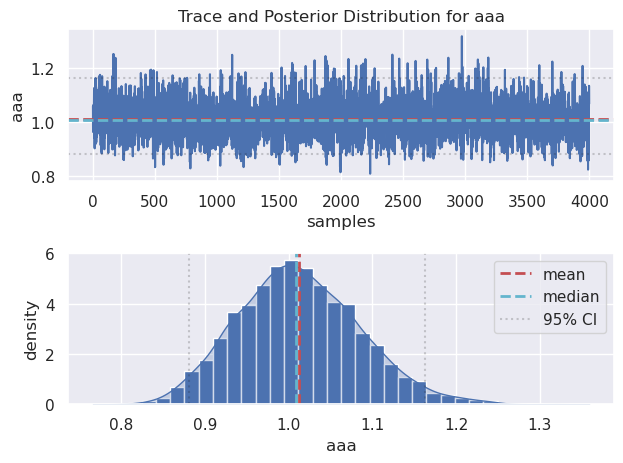

In [11]:
plot_trace(sigma, "aaa")

Abaixo outra fonte: <https://github.com/astrobayes/BMAD/blob/master/chapter_4/code_4.7.py>

In [12]:
# From: Bayesian Models for Astrophysical Data, Cambridge Univ. Press
# (c) 2017,  Joseph M. Hilbe, Rafael S. de Souza and Emille E. O. Ishida 
# 
# you are kindly asked to include the complete citation if you used this 
# material in a publication

# Code 4.7 - Multivariate normal linear model in Python using Stan
# 1 response (y) and 2 explanatory variables (x1, x2)

import numpy as np
import statsmodels.api as sm
import stan
from scipy.stats import uniform, norm

# Data
np.random.seed(1056)                 # set seed to replicate example
nobs= 5000                           # number of obs in model 
x1 = uniform.rvs(size=nobs)          # random uniform variable
x2 = uniform.rvs(size=nobs)          # second explanatory

X = np.column_stack((x1,x2))        # create response matrix
X = sm.add_constant(X)              # add intercept
beta = [2.0, 3.0, -2.5]             # create vector of parameters

xb = np.dot(X, beta)                                  # linear predictor, xb
y = np.random.normal(loc=xb, scale=1.0, size=nobs)    # create y as adjusted
                                                      # random normal variate 
# Fit
toy_data = {}                                # build data dictionary
toy_data['nobs'] = nobs                      # sample size
toy_data['x'] = X                            # explanatory variable         
toy_data['y'] = y                            # response variable
toy_data['k'] = toy_data['x'].shape[1]       # number of explanatory variables

# STAN code
stan_code = """
data {
    int<lower=1> k;  
    int<lower=0> nobs;                                 
    matrix[nobs, k] x;                     
    vector[nobs] y;                     
}
parameters {
    matrix[k,1] beta;                                             
    real<lower=0> sigma;               
}
transformed parameters{
    matrix[nobs,1] mu;
    vector[nobs] mu2;

    mu = x * beta;
    mu2 = to_vector(mu);                 // normal distribution 
                                         // does not take matrices as input
}
model {
    for (i in 1:k){                      // Diffuse normal priors for predictors
        beta[i] ~ normal(0.0, 100);
    }
    sigma ~ normal(0, 100);             // Uniform prior for standard deviation \\ nao mais

    y ~ normal(mu2, sigma);              // Likelihood function
}
"""

# Compile model
model = stan.build(stan_code, toy_data)

# perform fit
fit2 = model.sample(num_chains=4, num_samples=1000)


# Output
nlines = 9                                   # number of lines in screen output

output = str(fit).split('\n')
for item in output[:nlines]:
    print(item)   

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 

In file included from /home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/oestefal/.cache/httpstan/4.10.1/models/5x5f4mir/model_5x5f4mir.cpp:2:
/home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/ma

Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s


/home/oestefal/.cache/httpstan/4.10.1/models/5x5f4mir/model_5x5f4mir.cpp: In instantiation of ‘void model_5x5f4mir_namespace::model_5x5f4mir::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std::vector<int>; stan::require_vector_t<T_y>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/oestefal/.cache/httpstan/4.10.1/models/5x5f4mir/model_5x5f4mir.cpp:516:27:   required from here
/home/oestefal/.cache/httpstan/4.10.1/models/5x5f4mir/model_5x5f4mir.cpp:294:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
  294 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
/home/oestefal/.cache/httpstan/4.10.1/models/5x5f4mir/model_5x5f4mir.cpp: In instantiation of ‘void model_5x5f4mir_namespace::model_5x5f4mir::unconstrain_array_impl(const VecVar&, const VecI&, V

Building: 11.6s
Building: 11.7s
Building: 11.8s


/home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp: In instantiation of ‘TupleT stan::math::internal::grad_2F1_impl_ab(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double>; T3 = stan::math::var_value<double>; T_z = stan::math::var_value<double>; ScalarT = stan::math::var_value<double>; TupleT = std::tuple<stan::math::var_value<double, void>, stan::math::var_value<double, void>, stan::math::var_value<double, void> >]’:
/home/oestefal/.local/lib/python3.10/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:205:78:   required from ‘TupleT stan::math::internal::grad_2F1_impl(const T1&, const T2&, const T3&, const T_z&, double, int) [with bool calc_a1 = true; bool calc_a2 = true; bool calc_b1 = true; bool calc_z = true; T1 = stan::math::var_value<double>; T2 = stan::math::var_value<double

Building: 11.9s
Building: 12.0s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s
Building: 15.6s
Building: 15.7s
Building: 15.8s
Building: 15.9s
Building: 16.0s
Building: 16.1s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.6s
Building: 16.7s
Building: 16.8s
Building: 16.9s
Building: 17.0s
Building: 17.1s
Building: 17.2s
Building: 17.3s
Building: 17.4s
Building: 17.5s
Building: 17.6s
Building: 17.7s
Building: 17.8s
Building: 17.9s
Building: 18.1s
Building: 18.2s
Building: 18.3s
Building

Building: 36.9s, done.
Messages from stanc:
Warning in '/tmp/httpstan_6x4p1ws7/model_5x5f4mir.stan', line 24, column 22: Argument
    100 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_6x4p1ws7/model_5x5f4mir.stan', line 22, column 30: Argument
    100 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   1% (100/8000)
Sampling:   2% (200/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   9% (700/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  18% (1400/8000)
Sampling:  20% (1600/8000)
Sampling:  22% (1800/8000)
Sampling:  26% (2100/8000)
Sampling:  29% (2300/8000)
Sampling:  31% (2500/8000)
Sampling:  34% (2700/8000)
Sampling:  36% (2900/8000)
Sampling:  39% (3100/8000)
Sampling:  55% (440

<stan.Fit>
Parameters:
    alpha: ()
    beta: ()
    sigma: ()
Draws: 4000


In [13]:
print(output)

['<stan.Fit>', 'Parameters:', '    alpha: ()', '    beta: ()', '    sigma: ()', 'Draws: 4000']


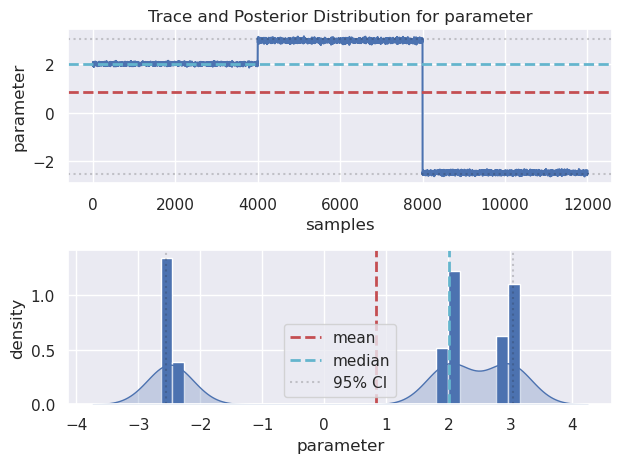

In [14]:
beta2 = fit2['beta'].reshape(12000,)
sigma2 = fit2['sigma'].reshape(4000,)
#mu2 = fit2['mu'].reshape(20000000,)

plot_trace(beta2)

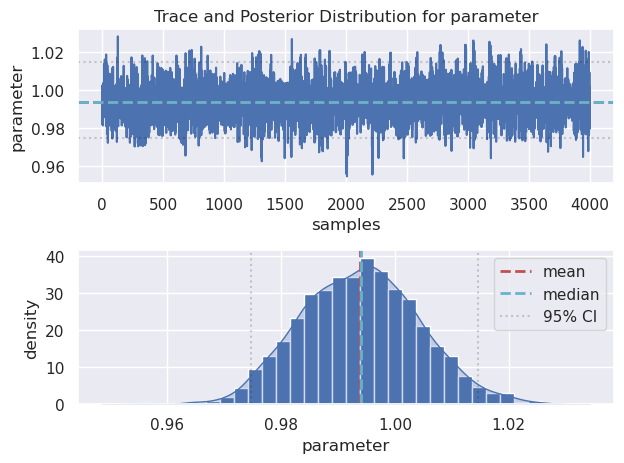

In [15]:
plot_trace(sigma2)